# Taller 26 de julio

**Andrés Ospina Patiño**

Escoja una serie del S&P 500 desde Enero 1 de 2022 hasta  Julio 26 de 2022, y realice todo el proceso de Identificación visto en clase.

In [2]:
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
### Load data
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 7, 26)

df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('AMZN.csv')


Se procede a obtener los precios de cierre de la acción de Amazon entre el 3 de enero y el 26 de julio del presente año de la plataforma Yahoo finance.

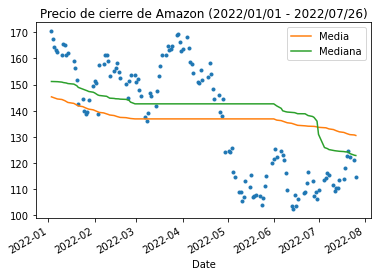

In [4]:
amzn = df['Close']
moving_average = amzn.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).mean()
moving_median = amzn.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).median()
ax = amzn.plot(style=".")
moving_average.plot(ax=ax, label="Media", legend=True);
moving_median.plot(ax=ax, label="Mediana", legend=True, title="Precio de cierre de Amazon (2022/01/01 - 2022/07/26)");

Luego se grafican los precios de las acciones para fecha y se obtienen la media y la mediana de la serie.

In [5]:
adfuller(amzn)

(-1.4999532056526443,
 0.533534487277881,
 0,
 140,
 {'1%': -3.4779446621720114,
  '5%': -2.8824156122448983,
  '10%': -2.577901887755102},
 740.4031538034245)

Dado el p-valor obtenido en la prueba de Dickey-Fuller aumentada (0.53) y teniendo en cuenta que no es menor que 0.05, no se rechaza la hipótesis nula, lo que quiere decir que no se rechaza la no estacionariedad de la serie, es decir que, hay una estructura de dependencia del tiempo y no hay una variación constante.

In [6]:
kpss(amzn)

/var/folders/2b/f60r175j3t14frh_7_hprgq00000gn/T/ipykernel_6364/1840125961.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(amzn)


(1.2554674298765183,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Para el caso del KPSS, se obtiene un p-valor de 0.01, lo que quiere decir que se rechaza la hipótesis nula (estacionariedad), por lo que se observa que hay congruencia entre las dos pruebas realizadas, ambas concluyendo no estacionariedad.

Dada la no estacionariedad de la serie, se procede a realizar una transformación BOX-COX de tipo logaritmo natural dada la interpretabilidad que tienen este y que no hay valores negativos o iguales a 0 en la serie.

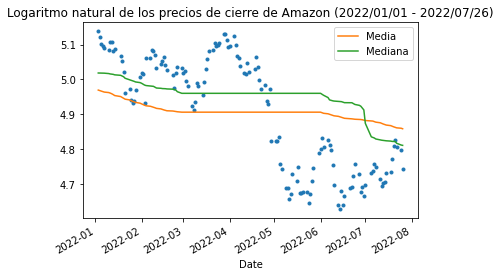

In [7]:
amzn_ln = np.log(amzn)
moving_average = amzn_ln.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).mean()
moving_median = amzn_ln.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).median()
ax = amzn_ln.plot(style=".")
moving_average.plot(ax=ax, label="Media", legend=True);
moving_median.plot(ax=ax, label="Mediana", legend=True, title="Logaritmo natural de los precios de cierre de Amazon (2022/01/01 - 2022/07/26)");

Luego de la transformación se evidencia una reducción considerable de la escla, sin embargo el comportamiento persiste, por lo que se procede a realizar nuevamente las pruebas, teniendo en cuenta la transformación BOX-COX realizada.

In [8]:
adfuller(amzn_ln)

(-1.4304951398493686,
 0.5675722308746624,
 0,
 140,
 {'1%': -3.4779446621720114,
  '5%': -2.8824156122448983,
  '10%': -2.577901887755102},
 -491.05461254109196)

In [9]:
kpss(amzn_ln)

/var/folders/2b/f60r175j3t14frh_7_hprgq00000gn/T/ipykernel_6364/2553537387.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(amzn_ln)


(1.2619135472796843,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Nuevamente las pruebas concluyen no estacionariedad en ambas pruebas, por lo que se procede a realizar una transformación BOX-COX de tipo $\frac{x_t^\lambda - 1}{\lambda}$

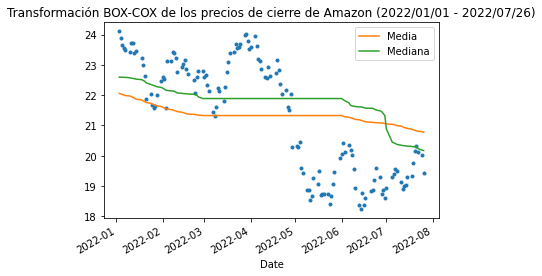

In [10]:
amzn_05 = (amzn**0.5 - 1)/0.5
moving_average = amzn_05.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).mean()
moving_median = amzn_05.rolling(
    window = (end-start).days,
    center = True,
    min_periods = int((end-start).days/2)
).median()
ax = amzn_05.plot(style=".")
moving_average.plot(ax=ax, label="Media", legend=True);
moving_median.plot(ax=ax, label="Mediana", legend=True, title="Transformación BOX-COX de los precios de cierre de Amazon (2022/01/01 - 2022/07/26)");

In [11]:
adfuller(amzn_05)

(-1.460794464981616,
 0.5528090014096332,
 0,
 140,
 {'1%': -3.4779446621720114,
  '5%': -2.8824156122448983,
  '10%': -2.577901887755102},
 123.58208758074932)

In [12]:
kpss(amzn_05)

/var/folders/2b/f60r175j3t14frh_7_hprgq00000gn/T/ipykernel_6364/3568389375.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(amzn_05)


(1.2594683121648955,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Luego de realizar diversos experimentos para diferentes valores de $\lambda$ no se encontró ninguno que garantizara estacionariedad.

A continuación se procede a analizar las funciones de auto-correlación y la de auto-correlación parcial, aunque no es muy apropiado ya que no se garantiza estacionariedad.

<AxesSubplot:xlabel='Date'>

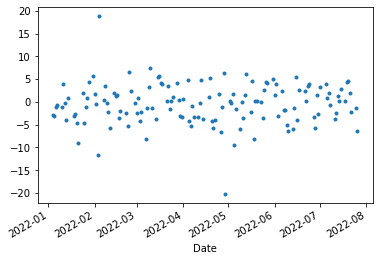

In [23]:
amzn_dif = amzn - amzn.shift(1)
amzn_dif.plot(style=".")

In [24]:
adfuller(amzn_dif.dropna())

(-11.860634528785273,
 6.860206589685757e-22,
 0,
 139,
 {'1%': -3.4782936965183815,
  '5%': -2.882567574015525,
  '10%': -2.5779830117488745},
 735.6880820534444)

In [25]:
kpss(amzn_dif.dropna())

/var/folders/2b/f60r175j3t14frh_7_hprgq00000gn/T/ipykernel_6364/3904467609.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(amzn_dif.dropna())


(0.07228842309224856,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

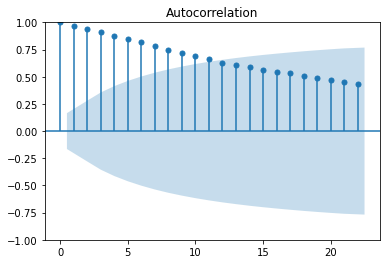

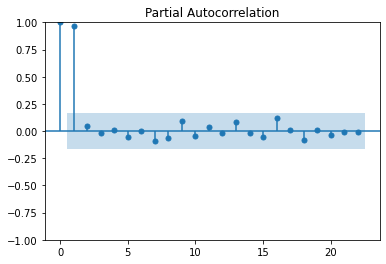

In [15]:
plot_acf(amzn)
plot_pacf(amzn)
plt.show()

Si la serie fuese estacionaria, se tendría un proceso de tipo AR(2), pues se observa como en la función de auto-correlación parcial a partir del tercer momento los valores no son significativos.